# Dimensionality reduction 0

Practice applying and using dimensionality reduction for analysing datasets with Principal Component Analysis (`PCA` & `Kernel PCA`). Exercise is to be continued with more advanced algorithms: t-SNE and UMAP.

---

### Data

We will start by using the "Wine data set", which is a clean multi-variate set used to demonstrate classification algorithms. There are 13 features:

`1.  Alcohol`\
`2.  Malic acid`\
`3.  Ash`\
`4.  Alcalinity of ash`\
`5.  Magnesium`\
`6.  Total phenols`\
`7.  Flavanoids`\
`8.  Nonflavanoid phenols`\
`9.  Proanthocyanins`\
`10. Color intensity`\
`11. Hue`\
`12. OD280/OD315 of diluted wines`\
`13. Proline`

The data set is small and contains three classes of objects, each with a fairly well-defined feature space. These features have largely linear relationships, which makes it well-suited for demonstrating how PCA works.

Source: https://archive.ics.uci.edu/ml/datasets/wine.

---

* Authors:  Vadim Rusakov, Troels Petersen
* Email:    petersen@nbi.dk
* Date:     5th of May 2025

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn import preprocessing
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA, KernelPCA

In [2]:
### Set default plot parameters

# Font and fontsize
rc = {"font.family" : "serif", 
      "mathtext.fontset" : "stix"}
plt.rcParams.update(rc)
plt.rcParams["font.serif"] = ["Times New Roman"] + plt.rcParams["font.serif"]
plt.rcParams['font.size'] = 14
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12

# Grid
plt.rcParams['grid.linestyle'] = '--'
plt.rcParams['grid.linewidth'] = 0.5
plt.rcParams['grid.color'] = 'white'
plt.rcParams['axes.grid'] = True

# Background color
plt.rcParams['axes.facecolor'] = 'lightgrey'

In [3]:
# a quick function for plotting our PCA components
def plot_pca(y_pcs, y):
    #=== plot PCA results
    fig, ax = plt.subplots(1, figsize=(5, 5), dpi=100)
    #ax.set_xlim(np.percentile(y_pcs[:,0], 99), np.percentile(y_pcs[:,0], 1))
    #ax.set_ylim(np.percentile(y_pcs[:,1], 99), np.percentile(y_pcs[:,1], 1))
    ax.set_xlabel('Component 1')
    ax.set_ylabel('Component 2')

    # locate the points of each type in the original data
    # and paint them over the transformed data
    is_type1 = (y == 0)
    is_type2 = (y == 1)
    is_type3 = (y == 2)
    ax.scatter(y_pcs[is_type1, 0], y_pcs[is_type1, 1], 
               c='y', marker='s', label='Type 1')
    ax.scatter(y_pcs[is_type2, 0], y_pcs[is_type2, 1], 
               c='b', marker='o', label='Type 2')
    ax.scatter(y_pcs[is_type3, 0], y_pcs[is_type3, 1], 
               c='g', marker='^', label='Type 3')
    ax.legend()
    plt.show()
    return 

First, load the data, split it into features `X` and labels `y`. Then apply PCA to it and plot the results:

In [4]:
# Load the wine dataset
data = load_wine()
X = data['data']
y = data['target']

# PCA (Raw data):

Let us apply the PCA without doing anything to the data:

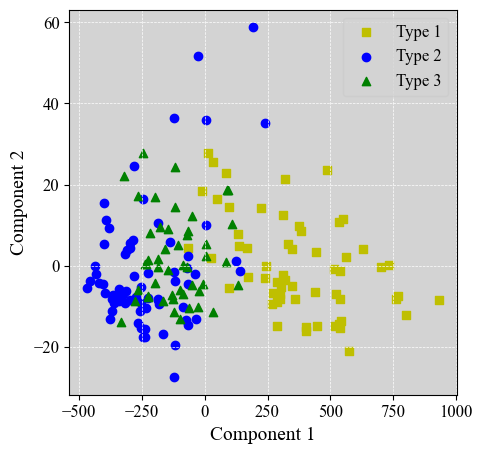

In [5]:
pca = PCA(n_components=2, svd_solver='full') # get a pca object of class PCA()
y_pcs = pca.fit_transform(X) # train pca object

# plot PCA results
plot_pca(y_pcs, y)

# PCA (normalized data):

Ok, the three groups do not appear to be distinct. However, we would expect for these classes to have distinct principal components. So something does not quite work. Remember to check the distributions of variables:

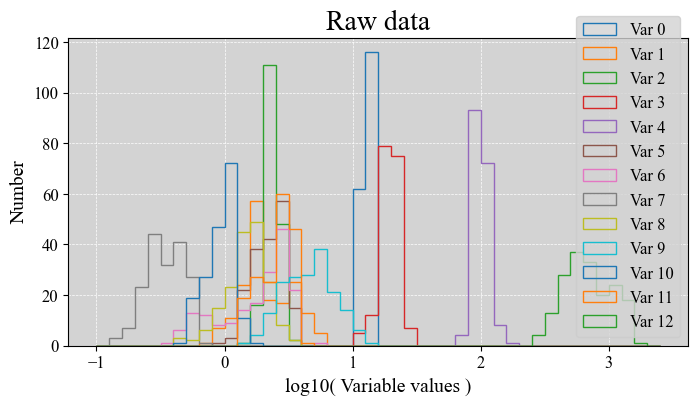

In [6]:
fig, ax = plt.subplots(1, figsize=(8, 4), dpi=100)
ax.set_xlabel('log10( Variable values )')
ax.set_ylabel('Number')
ax.set_title('Raw data')
xbins = np.arange(-1, 3.5, 0.1)

for i in range(X.shape[1]):
    ax.hist(np.log10(X[:, i]), bins=xbins, histtype='step', label=f'Var {i}')

ax.legend()
plt.show()

As you can see that the distributions of variables are normalized very differently. Let's fix it and try again:

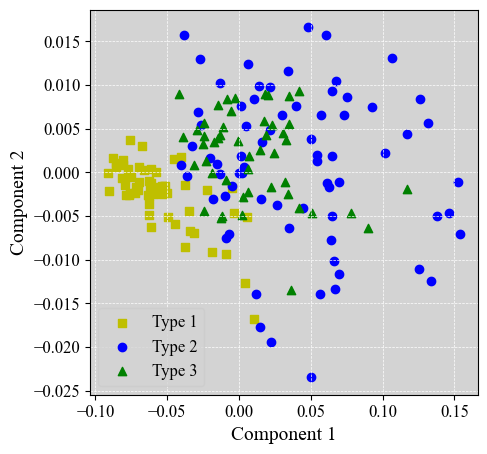

In [7]:
# normalize X
transform = preprocessing.Normalizer(norm='l2')
X_norm = transform.fit_transform(X)

# transform X_norm
y_pcs = pca.fit_transform(X_norm) # train pca object

# plot new PCA results
plot_pca(y_pcs, y)

Still does not work, though Type 1 became a bit more distinct. Let's see those new distributions:

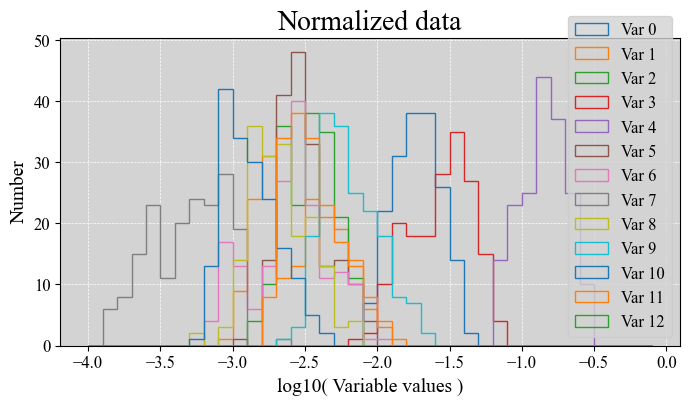

In [8]:
fig, ax = plt.subplots(1, figsize=(8, 4), dpi=100)
ax.set_xlabel('log10( Variable values )')
ax.set_ylabel('Number')
ax.set_title('Normalized data')
xbins = np.arange(-4, 0, 0.1)

for i in range(X.shape[1]):
    x_pos = X_norm[:, i][X_norm[:, i] > 0.0]
    ax.hist(np.log10(x_pos), bins=xbins, histtype='step', label=f'Var {i}')

ax.legend()
plt.show()

# PCA (standardized data):

They are centered similarly, but seem to have different scales. Can we do better by scaling them similarly in addition to normalizing (i.e., standardizing them)? Looks much better. 

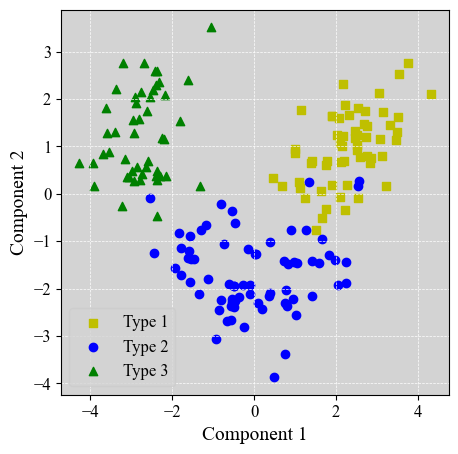

In [9]:
# Standardize X
transform = preprocessing.StandardScaler()
X_std = transform.fit_transform(X)

# Transform X_std
y_pcs = pca.fit_transform(X_std) # train pca object

# Plot new PCA results
plot_pca(y_pcs, y)

See, the distributions are much more separated now. You can play around with other data transformers too. You may want to think about whether you have any outliers and how to deal with them. Also, sometimes variables can have different underlying distributions and therefore need to be transformed to the same (ideally, symmetric and standardized) distribution. Here is the link:

https://scikit-learn.org/stable/modules/preprocessing.html

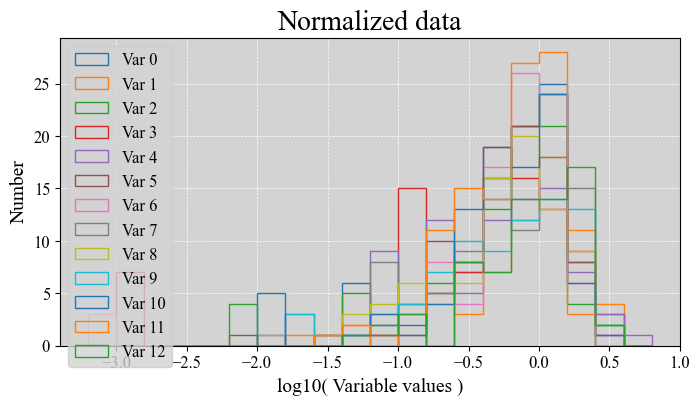

In [10]:
fig, ax = plt.subplots(1, figsize=(8, 4), dpi=100)
ax.set_xlabel('log10( Variable values )')
ax.set_ylabel('Number')
ax.set_title('Normalized data')
xbins = np.arange(-3.2, 1.0, 0.2)

for i in range(X.shape[1]):
    x_pos = X_std[:, i][X_std[:, i] > 0.0]
    ax.hist(np.log10(x_pos), bins=xbins, histtype='step', label=f'Var {i}')

ax.legend(loc=2)
plt.show()

# Kernel PCA:

Finally, we can comoute the principal components using a non-linear kernel, which can slightly improve the classification in this case. 

`KernelPCA` is a variant of the PCA, which can use a range of kernels for non-linear operations. I.e., this extension gives flexibility in separating the data that are not linearly-separable. Make sure to try different kernels for reducing the dimensionality. See documentation for `KernelPCA` in **sklearn**.

For Kernel PCA see the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html#sklearn.decomposition.KernelPCA).

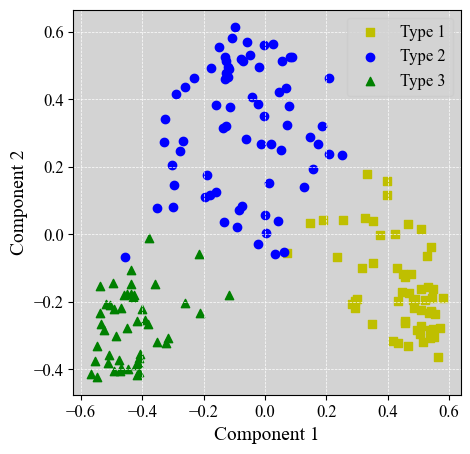

In [11]:
# standardize X
transform = preprocessing.StandardScaler()
X_std = transform.fit_transform(X)

# transform X_norm
kpca = KernelPCA(n_components=2, kernel='rbf')
y_pcs = kpca.fit_transform(X_std)

# plot new PCA results
plot_pca(y_pcs, y)

# Exercise:

The above code was the simply introduction to dimensionality reduction. Now expand in methods (t-SNE and UMAP) and dataset:
1. Try the t-SNE and UMAP methods on the wine set (if nothing else, then just to see that they work here).
2. Now use the same methods on the "Galaxies" data set (cosmos2015.csv).

# Learning points:

1. You should first of all know that these methods exists, that they are unsupervised, and that their foremost capability is to reduce high dimensional data (where we can't "see" the data) to lower (2-3) dimensional data, where we can "see" it in a plot.
2. The PCA is only linear but very fast, while the other methods are non-linear and powerful but slow. For this reason, it makes sense to use both the PCA and e.g. UMAP.
3. Only use the t-SNE and UMAP methods for up to $10^4$-$10^5$ events, possibly selected at random from a larger dataset.
4. Dimensionality reduction methods can be used for many things, anomaly detection among them. One can simply run it on "unknown" data, and get an idea of the data structure fast. 

____

# Using t-SNE and UMAP to lower dimensionality


In [12]:
# Importing t-SNE from sklearn
from sklearn.manifold import TSNE

# Importing UMAP 
from umap import UMAP



2025-05-07 15:19:44.586099: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


/Users/nielsaugustdavidsen/Documents/GitHub/AppliedML2025_fork/appmlenv/lib/python3.12/site-packages/threadpoolctl.py:1226: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


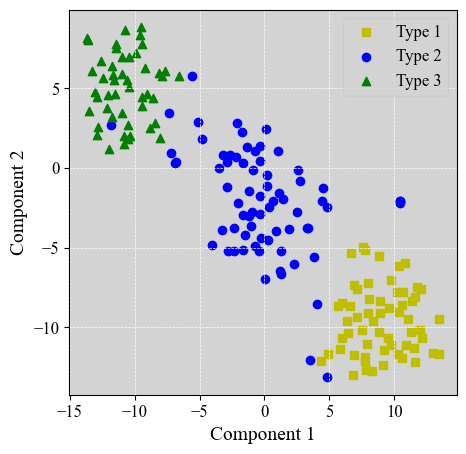

In [13]:
# t-SNE
params = {
    'n_components': 2,
    'perplexity': 30
}

tsne_data =  TSNE(**params).fit_transform(X_std)

plot_pca(tsne_data, y)


5


/Users/nielsaugustdavidsen/Documents/GitHub/AppliedML2025_fork/appmlenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/nielsaugustdavidsen/Documents/GitHub/AppliedML2025_fork/appmlenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/nielsaugustdavidsen/Documents/GitHub/AppliedML2025_fork/appmlenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/nielsaugustdavidsen/Documents/GitHub/AppliedML2025_fork/appmlenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed i

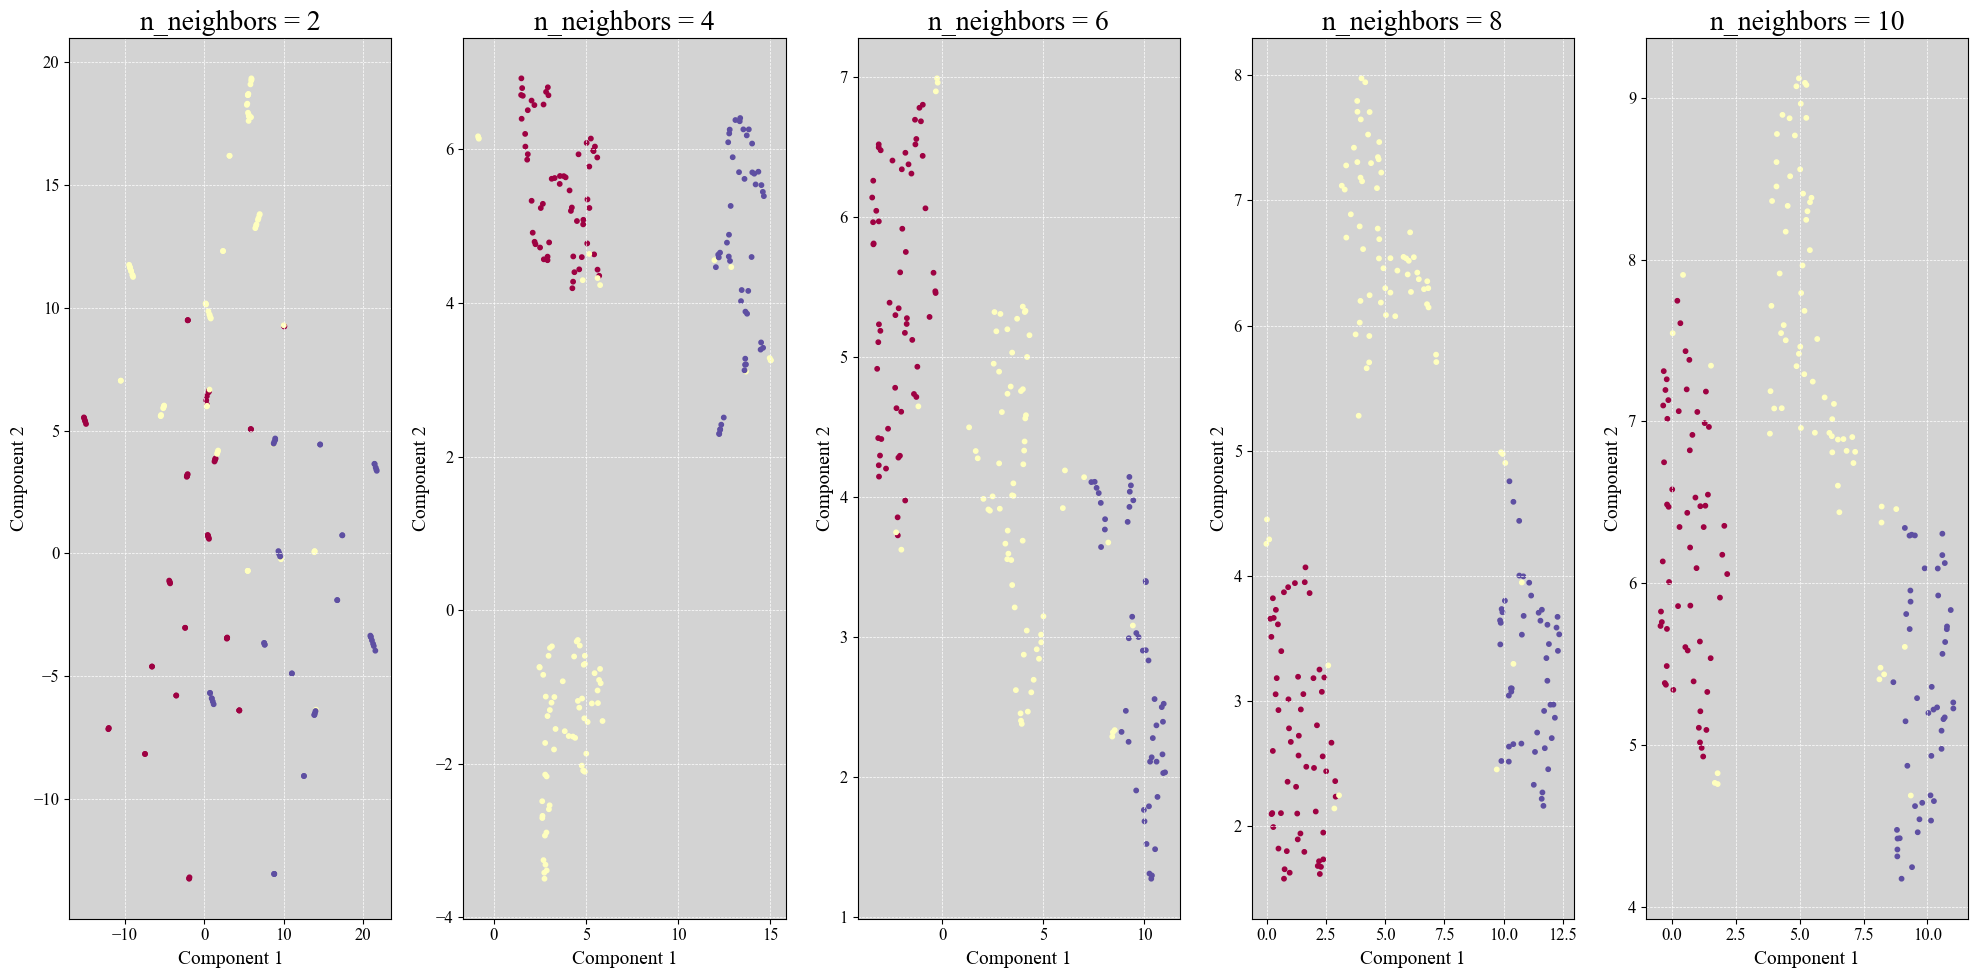

In [ ]:
# UMAP
umap_data = []
n_neighbors = np.arange(2, 12, 2)
fig, ax = plt.subplots(1, 5, figsize=(20, 10), dpi=100)


for i, n in enumerate(n_neighbors):
    reducer = UMAP(n_neighbors=n, n_components=2)
    umap_data.append(reducer.fit_transform(X_std))
    ax[i%5].scatter(umap_data[i][:, 0], umap_data[i][:, 1], 
                            c=y, cmap='Spectral', s=10)
    ax[i%5].set_title(f'n_neighbors = {n}')
    ax[i%5].set_xlabel('Component 1')
    ax[i%5].set_ylabel('Component 2')
    

fig.tight_layout()